## Compare masks

In [1]:
import os

import numpy as np
import matplotlib as mpl
#mpl.use('TkAgg')
import matplotlib.pyplot as plt
from scipy import ndimage
import matplotlib.image as mpimg



In [2]:
# Вывод данных в виде изображения
# data - массив данных
# title - подпись к изоюражению
# size - размер подложки
def show_img(data, title = "", size = 15, cmap_user = plt.cm.cool):
    plt.figure(figsize=(size, size))
    plt.imshow(data, cmap_user)#, cmap = plt.cm.cividis) #cividis #tab20c
    plt.xlabel(title)    
    plt.show()
    plt.close()
     

In [3]:
FILL_RADIUS = 7.5 #для отбора кандидатов
#cmap_ir11 = ListedColormap(pal.ir11_palette[::-1] / 255)

In [4]:
def cmp_masks(labels_1, label_im_1, labels_b, label_im_b):
    cnt_ok = 0 #совпали полностью
    cnt_part = 0 #совпали частично
    cnt_no = 0   #нет совпадения
    cnt_false = labels_1.copy() #лишняя, которой нет на эталоне


    for num in labels_b:
        if num == 0:
            continue
        mask_one = (label_im_b == num)
        mask_1 = np.ma.masked_array(label_im_1, ~mask_one) 
        #print(mask_1.compressed())
        labels_m1 = np.unique(mask_1.compressed())
        if (labels_m1.size == 1):
            if (labels_m1[0] == 0):
                cnt_no += 1
            else:
                mask_one_1 = (label_im_1 == labels_m1[0])
                labels_m1_b = np.unique(np.ma.masked_array(label_im_b, ~mask_one_1).compressed())                        
                if (labels_m1_b.size == 1):
                    cnt_ok += 1
                else:
                    cnt_part += 1
                cnt_false[cnt_false == labels_m1[0]] = 0
        else:
            cnt_part += 1
            cnt_false[cnt_false == labels_m1[1]] = 0
        #print(cnt_ok, cnt_part, cnt_no, cnt_false )
        
        #print(labels_m1)    
        #show_img(mask_1, size =10)

    #show_img(mask_1, size =15)
   
    return cnt_ok, cnt_part, cnt_no, np.sum(cnt_false.astype(bool))
    


In [5]:
#pal.ir11_palette.shape

In [6]:
!pwd

/media/terra/fromOld/na_razbor/job/vka/doc/job/study/practice/ot


In [13]:
mask_folder = './result/'

folder = os.listdir(mask_folder)

epoch_folders = [ii for ii in folder if ii.startswith('submit')]
#epoch_folders = [ii for ii in folder if ii.startswith('test_submit')]
epoch_folders.sort()

In [14]:


apod = []
afar = []
aprec = []
arecall = []
af1 = []

#epoch_folders = ['submit_20200430T_38_08']

for epoch_folder in epoch_folders:
    
    
    
    #print(files)
    epoch_folder += '/'
    
    sum_mask = 0
    sum_ok = 0
    sum_part = 0
    sum_no = 0
    sum_false = 0

    folder = os.listdir(mask_folder + epoch_folder)
    files = [ii for ii in folder if ii.endswith('_mask.png')]
    files.sort()
    
    #files = ["s20192181800536_1000_1000_3_masked_ir.png_mask.png"]
    
    for filename in files:
        #bench_name = "mask_test.png"
        #file1_name = "mask_test1.png"

        bench_name = filename.replace("masked_ir.png_mask.png", "mask_n.png");
        #эталонная
        #bench_name = "s20192151600520_1000_2000_0_mask_n.png"
        # рассчитанная
        file1_name = epoch_folder + filename

        mask_full = mpimg.imread(mask_folder + bench_name).astype(np.bool)        
          
        label_im_b, nb_labels_b = ndimage.label(mask_full)
        labels_b = np.unique(label_im_b)
        #print("labels_nb=", nb_labels_b, labels_b)
        #label_im = np.searchsorted(labels, label_im)     

        mask_full1 = mpimg.imread(mask_folder + file1_name).astype(np.bool)        
          
        label_im_1, nb_labels_1 = ndimage.label(mask_full1)
        labels_1 = np.unique(label_im_1)
        #print("labels_nb=", nb_labels_1, labels_1)

        cnt_ok, cnt_part, cnt_no, cnt_false = cmp_masks(labels_1, label_im_1, labels_b, label_im_b)
        
        sum_mask  = sum_mask  + len(labels_b) - 1 #минус фон
        sum_ok    = sum_ok    + cnt_ok
        sum_part  = sum_part  + cnt_part
        sum_no    = sum_no    + cnt_no
        sum_false = sum_false + cnt_false
        
    
        #print(cnt_ok, ";", cnt_part, ";", cnt_no, ";", cnt_false)
    pod = (sum_ok + sum_part) * 100. / sum_mask
    far = sum_false *100. / (sum_ok + sum_part + sum_false)
    prec = (sum_ok + sum_part) / (sum_ok + sum_part + sum_false) 
    recall = (sum_ok + sum_part) / (sum_mask)
    f1 = 2*prec*recall / (prec + recall)
    print(epoch_folder, ";", sum_ok, ";", sum_part, ";", sum_no, ";", sum_false, ";", 
          sum_mask, ";", len(files), ";" ,
          "{:.2f} ; {:.2f} ; {:.2f} ; {:.2f} ; {:.2f} ; {:.2f}".format(pod, far, pod/far, prec, recall, f1))  
          
    apod.append(pod)
    afar.append(far)
    aprec.append(prec)
    arecall.append(recall)
    af1.append(f1)

    #mask_no = np.ma.masked_array(label_im_b, label_im_1 != 0) 
    #mask_false = np.ma.masked_array(label_im_1, label_im_b != 0) 
    #show_img(label_im_b, size =10)
    
    #show_img(label_im_1, size =10)

    #show_img(mask_no, size =15)
    #show_img(mask_false, size =15)

submit_20200430T_21_05/ ; 0 ; 359 ; 193 ; 407 ; 552 ; 64 ; 65.04 ; 53.13 ; 1.22 ; 0.47 ; 0.65 ; 0.54
submit_20200430T_21_06/ ; 0 ; 313 ; 239 ; 305 ; 552 ; 64 ; 56.70 ; 49.35 ; 1.15 ; 0.51 ; 0.57 ; 0.54
submit_20200430T_21_07/ ; 0 ; 261 ; 291 ; 215 ; 552 ; 64 ; 47.28 ; 45.17 ; 1.05 ; 0.55 ; 0.47 ; 0.51
submit_20200430T_21_08/ ; 0 ; 189 ; 363 ; 134 ; 552 ; 64 ; 34.24 ; 41.49 ; 0.83 ; 0.59 ; 0.34 ; 0.43
submit_20200430T_21_09/ ; 0 ; 95 ; 457 ; 46 ; 552 ; 64 ; 17.21 ; 32.62 ; 0.53 ; 0.67 ; 0.17 ; 0.27
submit_20200430T_34_05/ ; 0 ; 403 ; 149 ; 510 ; 552 ; 64 ; 73.01 ; 55.86 ; 1.31 ; 0.44 ; 0.73 ; 0.55
submit_20200430T_34_06/ ; 0 ; 377 ; 175 ; 414 ; 552 ; 64 ; 68.30 ; 52.34 ; 1.30 ; 0.48 ; 0.68 ; 0.56
submit_20200430T_34_07/ ; 0 ; 341 ; 211 ; 319 ; 552 ; 64 ; 61.78 ; 48.33 ; 1.28 ; 0.52 ; 0.62 ; 0.56
submit_20200430T_34_08/ ; 0 ; 299 ; 253 ; 217 ; 552 ; 64 ; 54.17 ; 42.05 ; 1.29 ; 0.58 ; 0.54 ; 0.56
submit_20200430T_34_09/ ; 0 ; 206 ; 346 ; 110 ; 552 ; 64 ; 37.32 ; 34.81 ; 1.07 ; 0.65 ; 0.37

In [9]:
p = [0.5, 0.6, 0.7, 0.8, 0.9]

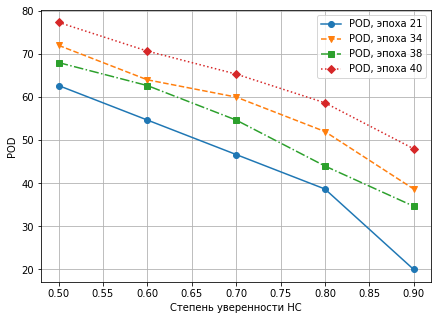

In [10]:
#test
plt.figure(figsize=(7, 5))
plt.xlabel("Степень уверенности НС")    
plt.ylabel("POD")
plt.plot(p, apod[0:5],   label ="POD, эпоха 21", marker = 'o')
#plt.plot(p, afar[0:5],   label ="FAR, эпоха 21")
plt.plot(p, apod[5:10],  label ="POD, эпоха 34", marker = 'v', linestyle = '--')
#plt.plot(p, afar[5:10],  label ="FAR, эпоха 34")
plt.plot(p, apod[10:15], label ="POD, эпоха 38", marker = 's', linestyle = '-.')
#plt.plot(p, afar[10:15], label ="FAR, эпоха 38")
plt.plot(p, apod[15:20], label ="POD, эпоха 40", marker = 'D', linestyle = ':')
#plt.plot(p, afar[15:20], label ="FAR, эпоха 40")
plt.legend()
plt.grid()
plt.show()

plt.close()

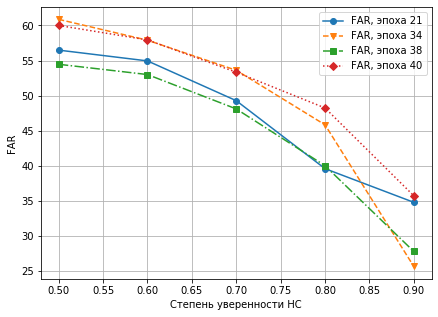

In [11]:
#test
plt.figure(figsize=(7, 5))
plt.xlabel("Степень уверенности НС")    
plt.ylabel("FAR")
#plt.plot(p, apod[0:5],   label ="POD, эпоха 21")
plt.plot(p, afar[0:5],   label ="FAR, эпоха 21", marker = 'o')
#plt.plot(p, apod[5:10],  label ="POD, эпоха 34")
plt.plot(p, afar[5:10],  label ="FAR, эпоха 34", marker = 'v', linestyle = '--')
#plt.plot(p, apod[10:15], label ="POD, эпоха 38")
plt.plot(p, afar[10:15], label ="FAR, эпоха 38", marker = 's', linestyle = '-.')
#plt.plot(p, apod[15:20], label ="POD, эпоха 40")
plt.plot(p, afar[15:20], label ="FAR, эпоха 40", marker = 'D', linestyle = ':')
plt.legend()
plt.grid()
plt.show()
plt.close()

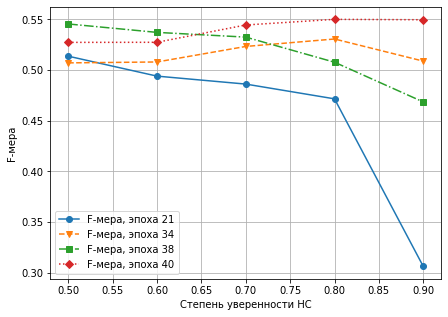

In [12]:
#test
plt.figure(figsize=(7, 5))
plt.xlabel("Степень уверенности НС")    
plt.ylabel("F-мера")
#plt.plot(p, aprec[0:5])
#plt.plot(p, arecall[0:5])
plt.plot(p, af1[0:5], label ="F-мера, эпоха 21", marker = 'o')
#plt.plot(p, aprec[5:10])
#plt.plot(p, arecall[5:10])
plt.plot(p, af1[5:10], label ="F-мера, эпоха 34", marker = 'v', linestyle = '--')
#plt.plot(p, aprec[10:15])
#plt.plot(p, arecall[10:15])
plt.plot(p, af1[10:15], label ="F-мера, эпоха 38", marker = 's', linestyle = '-.')
#plt.plot(p, aprec[15:20])
#plt.plot(p, arecall[15:20])
plt.plot(p, af1[15:20], label ="F-мера, эпоха 40", marker = 'D', linestyle = ':')

plt.legend()
plt.grid()
plt.show()
plt.close()

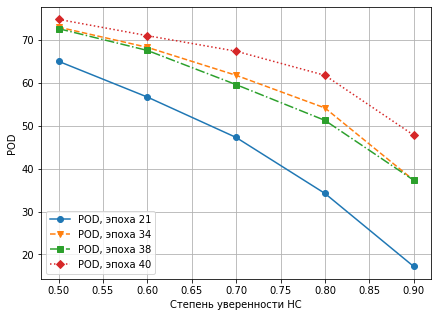

In [15]:
#valid
plt.figure(figsize=(7, 5))
plt.xlabel("Степень уверенности НС")    
plt.ylabel("POD")
plt.plot(p, apod[0:5],   label ="POD, эпоха 21", marker = 'o')
#plt.plot(p, afar[0:5],   label ="FAR, эпоха 21")
plt.plot(p, apod[5:10],  label ="POD, эпоха 34", marker = 'v', linestyle = '--')
#plt.plot(p, afar[5:10],  label ="FAR, эпоха 34")
plt.plot(p, apod[10:15], label ="POD, эпоха 38", marker = 's', linestyle = '-.')
#plt.plot(p, afar[10:15], label ="FAR, эпоха 38")
plt.plot(p, apod[15:20], label ="POD, эпоха 40", marker = 'D', linestyle = ':')
#plt.plot(p, afar[15:20], label ="FAR, эпоха 40")
plt.legend()
plt.grid()
plt.show()

plt.close()

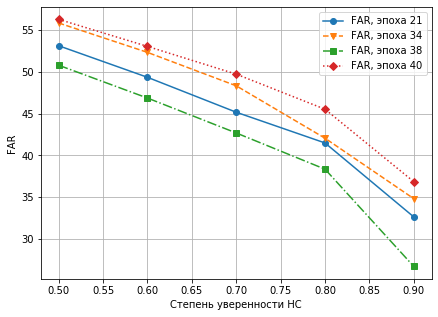

In [16]:
#valid
plt.figure(figsize=(7, 5))
plt.xlabel("Степень уверенности НС")    
plt.ylabel("FAR")
#plt.plot(p, apod[0:5],   label ="POD, эпоха 21")
plt.plot(p, afar[0:5],   label ="FAR, эпоха 21", marker = 'o')
#plt.plot(p, apod[5:10],  label ="POD, эпоха 34")
plt.plot(p, afar[5:10],  label ="FAR, эпоха 34", marker = 'v', linestyle = '--')
#plt.plot(p, apod[10:15], label ="POD, эпоха 38")
plt.plot(p, afar[10:15], label ="FAR, эпоха 38", marker = 's', linestyle = '-.')
#plt.plot(p, apod[15:20], label ="POD, эпоха 40")
plt.plot(p, afar[15:20], label ="FAR, эпоха 40", marker = 'D', linestyle = ':')
plt.legend()
plt.grid()
plt.show()
plt.close()

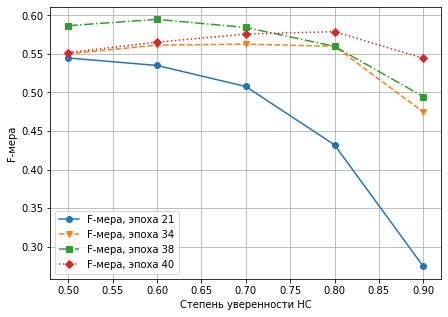

In [17]:
#valid
plt.figure(figsize=(7, 5))
plt.xlabel("Степень уверенности НС")    
plt.ylabel("F-мера")
#plt.plot(p, aprec[0:5])
#plt.plot(p, arecall[0:5])
plt.plot(p, af1[0:5], label ="F-мера, эпоха 21", marker = 'o')
#plt.plot(p, aprec[5:10])
#plt.plot(p, arecall[5:10])
plt.plot(p, af1[5:10], label ="F-мера, эпоха 34", marker = 'v', linestyle = '--')
#plt.plot(p, aprec[10:15])
#plt.plot(p, arecall[10:15])
plt.plot(p, af1[10:15], label ="F-мера, эпоха 38", marker = 's', linestyle = '-.')
#plt.plot(p, aprec[15:20])
#plt.plot(p, arecall[15:20])
plt.plot(p, af1[15:20], label ="F-мера, эпоха 40", marker = 'D', linestyle = ':')

plt.legend()
plt.grid()
plt.show()
plt.close()